#Imports

In [1]:
import sys, os, argparse
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.backends.cudnn as cudnn
import torchvision
import torch.nn.functional as F
from PIL import Image
from google.colab.patches import cv2_imshow

import time


#Get Files

In [2]:
!git clone https://github.com/karaposu/HeadOrientationExamples.git 
%cd HeadOrientationExamples/Hopenet_lite


Cloning into 'HeadOrientationExamples'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 22 (delta 1), reused 19 (delta 1), pack-reused 3
Unpacking objects: 100% (22/22), done.
/content/HeadOrientationExamples/Hopenet_lite


#Load Trained Model

In [ ]:
import hopenetlite_v2
net = hopenetlite_v2.HopeNetLite()
saved_state_dict = torch.load('./hopenet_lite_6MB.pkl', map_location="cpu")
net.load_state_dict(saved_state_dict, strict=False)
net.eval()

#Test with a test image

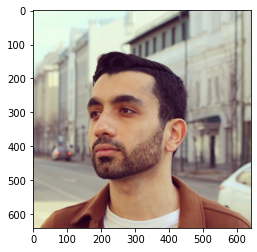

In [9]:
path="/content/HeadOrientationExamples/Hopenet_lite/a.png"
img = Image.open(path)

plt.imshow(img) 


In [14]:

transformations = transforms.Compose([transforms.Resize(224),
           transforms.CenterCrop(224), transforms.ToTensor(),
           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

img_transformed = transformations(img)

images = Variable(img_transformed)
images=torch.unsqueeze(images, 0)


start = time.process_time()


yaw, pitch, roll =net(images)  

print("Elapsed Time:", time.process_time() - start)



_, yaw_bpred = torch.max(yaw.data, 1)
_, pitch_bpred = torch.max(pitch.data, 1)
_, roll_bpred = torch.max(roll.data, 1)


print("Yaw:",yaw_bpred[0] )
print("Pitch:",pitch_bpred[0] )
print("Roll:",roll_bpred[0] )

# yaw_bpred.cpu().detach().numpy()

Elapsed Time: 0.020601122000000416
Yaw: tensor(64)
Pitch: tensor(29)
Roll: tensor(32)
